## PHASE 4 PROJECT: **Building a Time Series Model using Zillow Housing Dataset**

## OVERVIEW

Real estate industry is a highly capital intensive venture and thus extensive, accurate and predictive analysis is key. In this project I will conduct time series data analysis and gather valuable insights which will aid a mid-income house buyer make a house purchase decision wisely. The scope of this project ranges from Overall Business Understanding, Setting up Objectives, Data Understanding, Data Analysis, Data Modeling as well as conclusion and Recommendations. 

## 1. Business Understanding

Real estate sector is very dynamic and a major industry in all economies of the world. Most Americans dream of owning a house and thus Real estate reports and Analysis are vital in keeping them informed. This project utilizes historical data to paint a picture of major trends in the real estate sector over years and form basis of predicting future house prices. Key market factors that will aid in the modeling process will be the location of the houses as per the zip codes. 

## 2. Objectives

The overall objective of this project is to identify the best localities to invest in based on the house prices. 
Analyzing historical data to identify house price trends across different zip codes


###### Importing Necessary Libraries

In [1]:
# Importing necessary libraries
# Basics
import pandas as pd
import numpy as np
import itertools

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
import time

# Modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


Investigating the dataset

In [3]:
def analyze_dataset(df):

    # confirming the datatypes
    print(type(df))


    # Shape of the dataset
    print("Shape of the dataset:", df.shape,'\n')


    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])


    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')


    # Number of columns
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)


    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')


    # Dataset information
    print("Information about the dataset:")
    print(df.info())


    # Key statistics
    display(df.describe())

analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
Shape of the dataset: (14723, 272) 

Null columns only: Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
           ... 
2014-02      56
2014-03      56
2014-04      56
2014-05      56
2014-06      56
Length: 220, dtype: int64
Number of duplicates: 0 

Number of columns: 272
The unique values per column are:
RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
              ...  
2017-12        5248
2018-01        5276
2018-02        5303
2018-03        5332
2018-04        5310
Length: 272, dtype: int64 

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
None


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [4]:
df2 = df.copy()

Converting the datatype of time from integer into datetimes format:

In [5]:
def get_datetimes(df2):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """

    return pd.to_datetime(df2.columns.values[7:], format='%Y-%m')

In [6]:
df2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### Data Cleaning

Data cleaning will ensure that the dataframe is yields reliable results that are free from bias.

I will do the following: 
* Compute Return on Investment (ROI) which is the measure of best zipcodes to invest in 
* Filter all zip codes and choose the best 5 based on ROI
* Evaluate each distinct zip code to determine trends and seasonality
* Detecting and dealing with any missing values present
* Detrend the data using one of the several methods

Filtering the state column to observe New York State

In [7]:
df_ny = df2[df2['State'] == 'NY']

# Number of rows and columns
print(df_ny.shape)

# Sanity check
df_ny.head()

(1015, 272)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


Checking for null values and filling them using forward fill method

In [8]:
# Checking our dataframe for NaN values
print(f'There are {df_ny.isna().sum().sum()} NaNs in our original dataframe')

# Backfilling that single NaN
df_ny.fillna(method='ffill', inplace=True)

# Sanity check
print(f'There are {df_ny.isna().sum().sum()} NaNs after using forwardfill')


There are 4012 NaNs in our original dataframe
There are 0 NaNs after using forwardfill


Since our main focus of this analysis is determining the best regions to invest in, we shall use the Return of Investment as our metric.
ROI = (Final Value/Intial Value) - 1
The other element of interest is assesment of risk by use of standard deviation and mean to compute coefficient of variance. 

In [9]:
# Assuming historical return on investment for 'df_ny'
df_ny['ROI'] = (df_ny['2018-04'] / df_ny['1996-04']) - 1

# Calculate standard deviation of monthly values for 'df_ny'
df_ny['std'] = df_ny.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1)

# Calculate historical mean value for  'df_ny'
df_ny['mean'] = df_ny.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)

# Calculate coefficient of variance for 'df_ny'
df_ny['CV'] = df_ny['std'] / df_ny['mean']

# Show calculated values
df_ny[['RegionName', 'std', 'mean', 'ROI', 'CV']].head()

,RegionName,std,mean,ROI,CV
6,10467,8.569914e+04,2.923392e+05,1.733159,0.293150
10,11226,2.080187e+05,4.614242e+05,4.945679,0.450819
12,11375,2.240221e+05,6.081170e+05,3.297147,0.368387
13,11235,1.665122e+05,4.771932e+05,3.284514,0.348941
20,10011,4.193280e+06,4.801772e+06,59.253543,0.873278


In [10]:
# setting the  upper limit of CV according to risk profile for 'best5'.
upper_cv = df_ny['CV'].quantile(0.4)
print(f'\nCV upper limit: {upper_cv}')
# Get the 5 region  names with highest ROIs within the firm's risk profile for 'best5'.
RN_best5 = df_ny[df_ny['CV'] < upper_cv].sort_values('ROI', ascending=False).head(5)
print('\nBest 5 RegionName:')
print(RN_best5[['RegionName', 'ROI', 'CV']])


CV upper limit: 0.23863326394450968

Best 5 RegionName:
       RegionName       ROI        CV
14116       14065  1.660714  0.223623
12946       13040  1.566396  0.226185
8576        11771  1.501795  0.237330
11925       13491  1.410023  0.218232
12982       12154  1.377880  0.232964


Best Cities in NY: With the best (high ROI and low CV)

In [11]:
RN_best5.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14116,63398,14065,Freedom,NY,Olean,Cattaraugus,14117,39200.0,39700.0,40100.0,...,99500,100400,101700,103000,103800,104300,1.660714,15833.456790,70804.150943,0.223623
12946,62914,13040,Cincinnatus,NY,Cortland,Cortland,12947,36900.0,37200.0,37600.0,...,91700,92700,93600,93900,94100,94700,1.566396,15828.431937,69980.000000,0.226185
8576,62245,11771,Oyster Bay,NY,New York,Nassau,8577,334200.0,334400.0,334600.0,...,821200,820400,820600,822700,829200,836100,1.501795,153623.803098,647299.245283,0.237330
11925,63155,13491,Winfield,NY,Utica,Herkimer,11926,43900.0,44000.0,44200.0,...,103500,104200,105200,105500,105300,105800,1.410023,16931.938595,77586.792453,0.218232
12982,62431,12154,Schaghticoke,NY,Albany,Rensselaer,12983,86800.0,87600.0,88400.0,...,196800,198400,199100,200900,204100,206400,1.377880,35243.116639,151281.509434,0.232964


Summary Statistics of the best regions

In [12]:
RN_best5.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,62828.600000,12904.200000,12110.000000,108200.000000,108580.00000,108980.000000,109320.000000,109700.000000,110040.000000,110460.000000,...,262540.000000,263220.000000,264040.000000,265200.000000,267300.00000,269460.000000,1.503362,47492.149412,203390.339623,0.227667
std,483.921791,943.023701,2121.714637,127977.673834,127911.07067,127831.850491,127725.612154,127651.106537,127650.471993,127721.701367,...,315231.982832,314454.276485,314090.135152,314681.330873,317293.37371,320023.800677,0.115318,59901.496279,250486.723867,0.007566
min,62245.000000,11771.000000,8577.000000,36900.000000,37200.00000,37600.000000,38000.000000,38400.000000,38800.000000,39200.000000,...,91700.000000,92700.000000,93600.000000,93900.000000,94100.00000,94700.000000,1.377880,15828.431937,69980.000000,0.218232
25%,62431.000000,12154.000000,11926.000000,39200.000000,39700.00000,40100.000000,40500.000000,40900.000000,41300.000000,41700.000000,...,99500.000000,100400.000000,101700.000000,103000.000000,103800.00000,104300.000000,1.410023,15833.456790,70804.150943,0.223623
50%,62914.000000,13040.000000,12947.000000,43900.000000,44000.00000,44200.000000,44300.000000,44500.000000,44500.000000,44600.000000,...,103500.000000,104200.000000,105200.000000,105500.000000,105300.00000,105800.000000,1.501795,16931.938595,77586.792453,0.226185
75%,63155.000000,13491.000000,12983.000000,86800.000000,87600.00000,88400.000000,89100.000000,89800.000000,90400.000000,91100.000000,...,196800.000000,198400.000000,199100.000000,200900.000000,204100.00000,206400.000000,1.566396,35243.116639,151281.509434,0.232964
max,63398.000000,14065.000000,14117.000000,334200.000000,334400.00000,334600.000000,334700.000000,334900.000000,335200.000000,335700.000000,...,821200.000000,820400.000000,820600.000000,822700.000000,829200.00000,836100.000000,1.660714,153623.803098,647299.245283,0.237330


In [13]:
RN_best5['location'] = RN_best5['City'] + ", " + RN_best5['State']

In [14]:
best_5_RN_with_location = RN_best5[['RegionName','location']]
print(best_5_RN_with_location)

       RegionName          location
14116       14065       Freedom, NY
12946       13040   Cincinnatus, NY
8576        11771    Oyster Bay, NY
11925       13491      Winfield, NY
12982       12154  Schaghticoke, NY


The "Best 5 RN" section presents the top 5 zip codes which are: Freedom, NY:14065, Cincinnatus, NY:13040,Oyster Bay, NY:11771,Winfield, NY:13491,12154 Schaghticoke, NY:12154 They have been identified as the prime investment location with the highest Return on Investment (ROI) while being at par with risk profile's CV upper limit.

## Explanatory Data Analysis (EDA)

###### Univariate Analysis

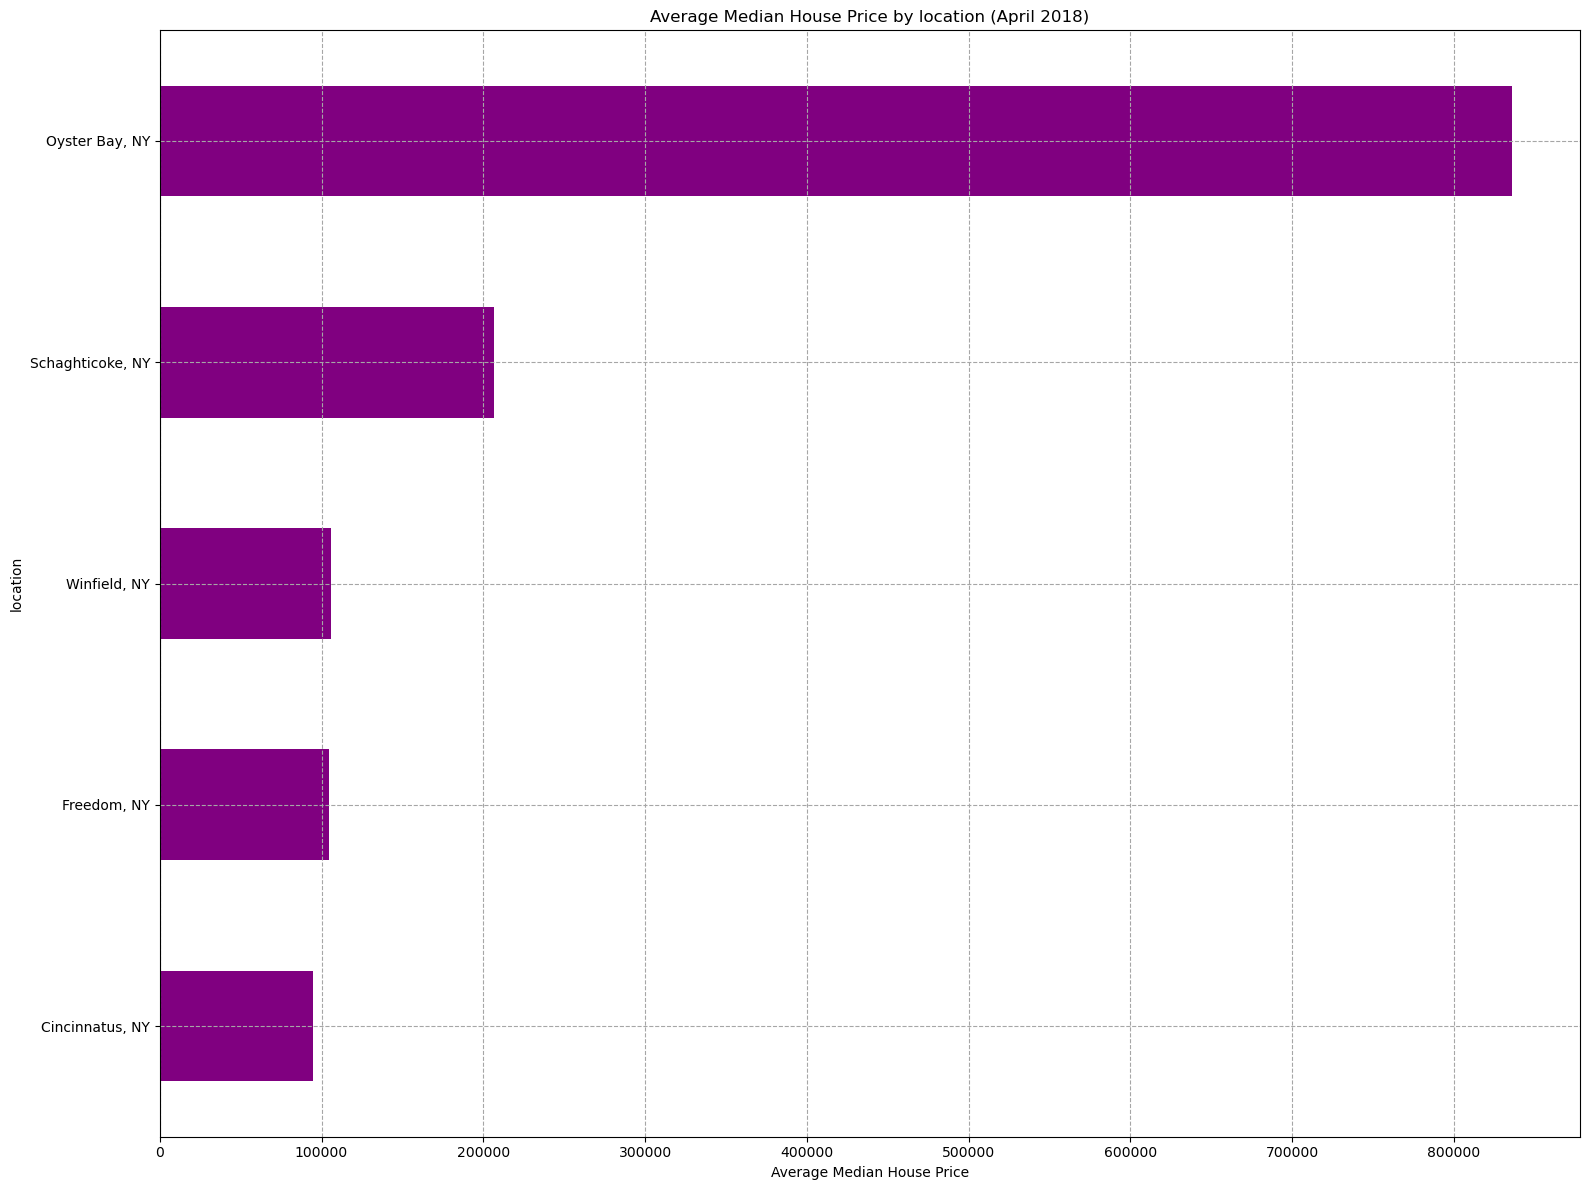

In [15]:
# getting the average median house price for each state in April 2018
locationprice = RN_best5.groupby('location')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
locationprice.plot(kind='barh', color='purple')
plt.title('Average Median House Price by location (April 2018)')
plt.xlabel('Average Median House Price')
plt.ylabel('location')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

It is evident that Oyester Bay,NY has the highest value, with around USD 825,000. Cincinnatus, NY shows the lowest average median property price at USD 95,000.

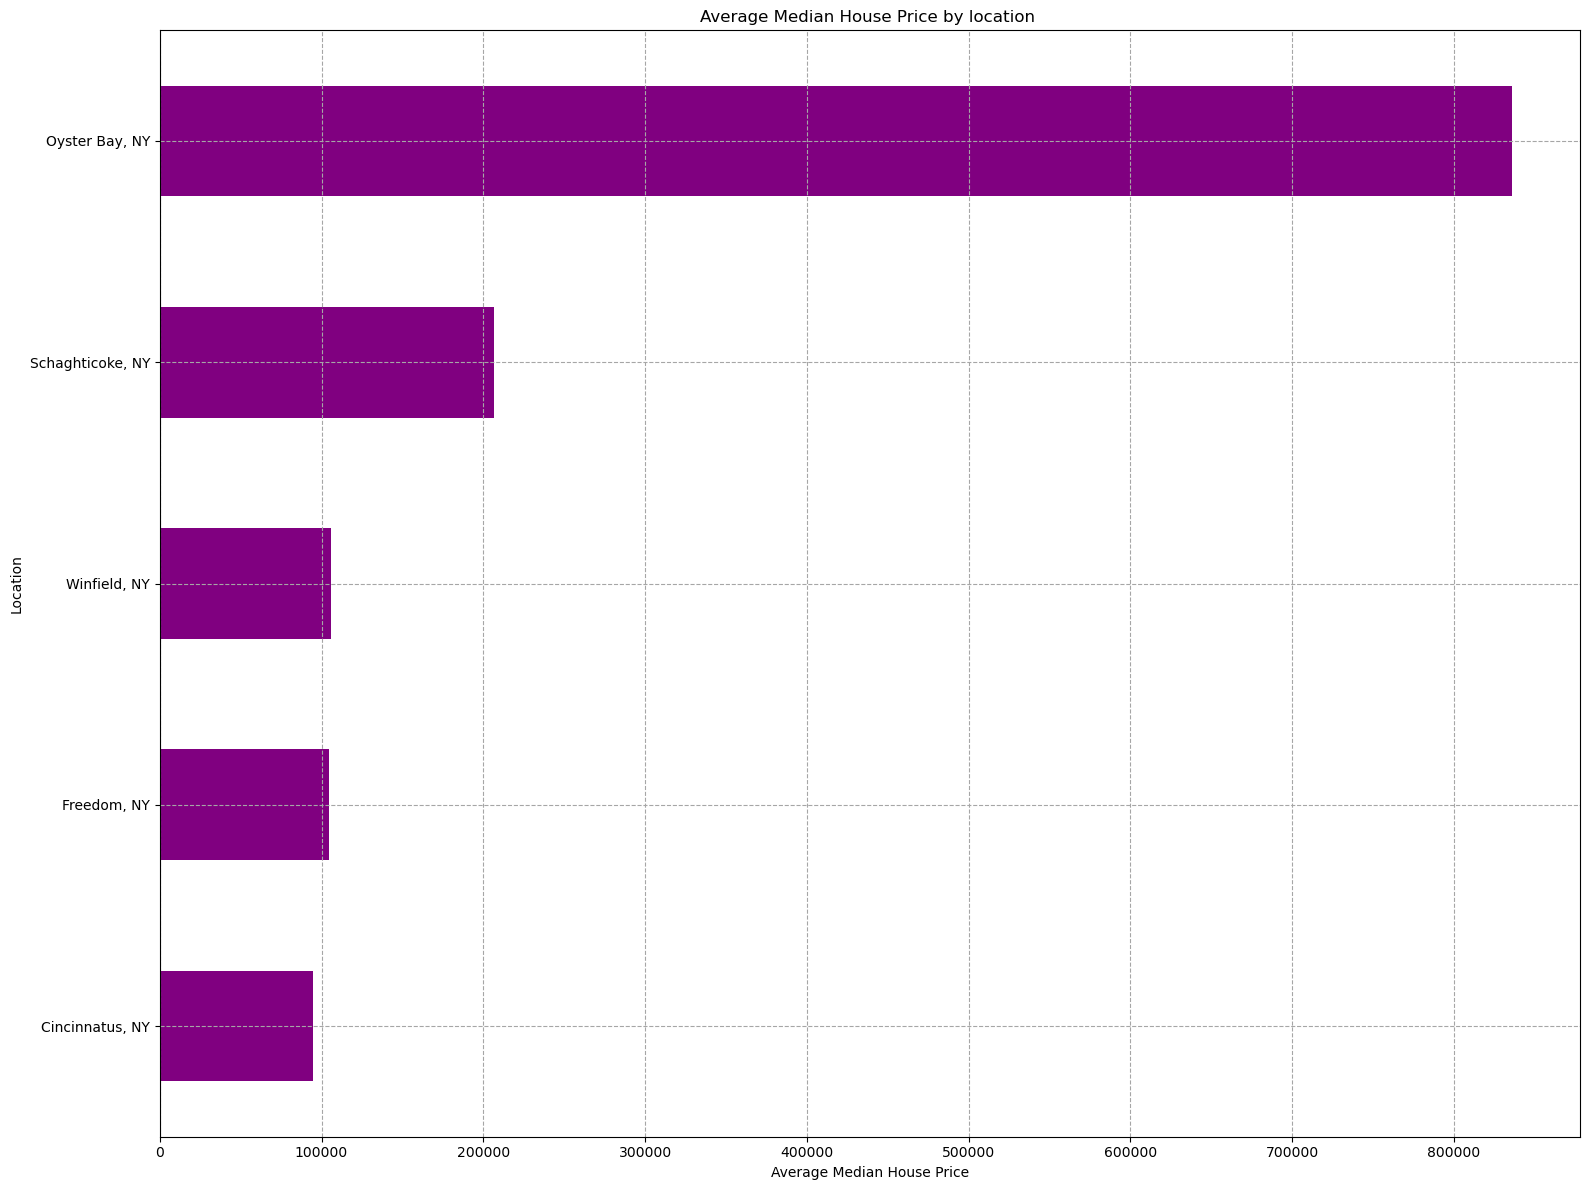

In [16]:
# Select the top 5 locations
top5_locations = RN_best5['location'].value_counts().nlargest(5).index

# Filter the data for the top 5 locations
filtered_data = RN_best5[RN_best5['location'].isin(top5_locations)]

# Calculate the average median house price for April 2018 for the top 5 locations
locationprice = filtered_data.groupby('location')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
locationprice.plot(kind='barh', color='purple')
plt.title('Average Median House Price by location ')
plt.xlabel('Average Median House Price')
plt.ylabel('Location')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

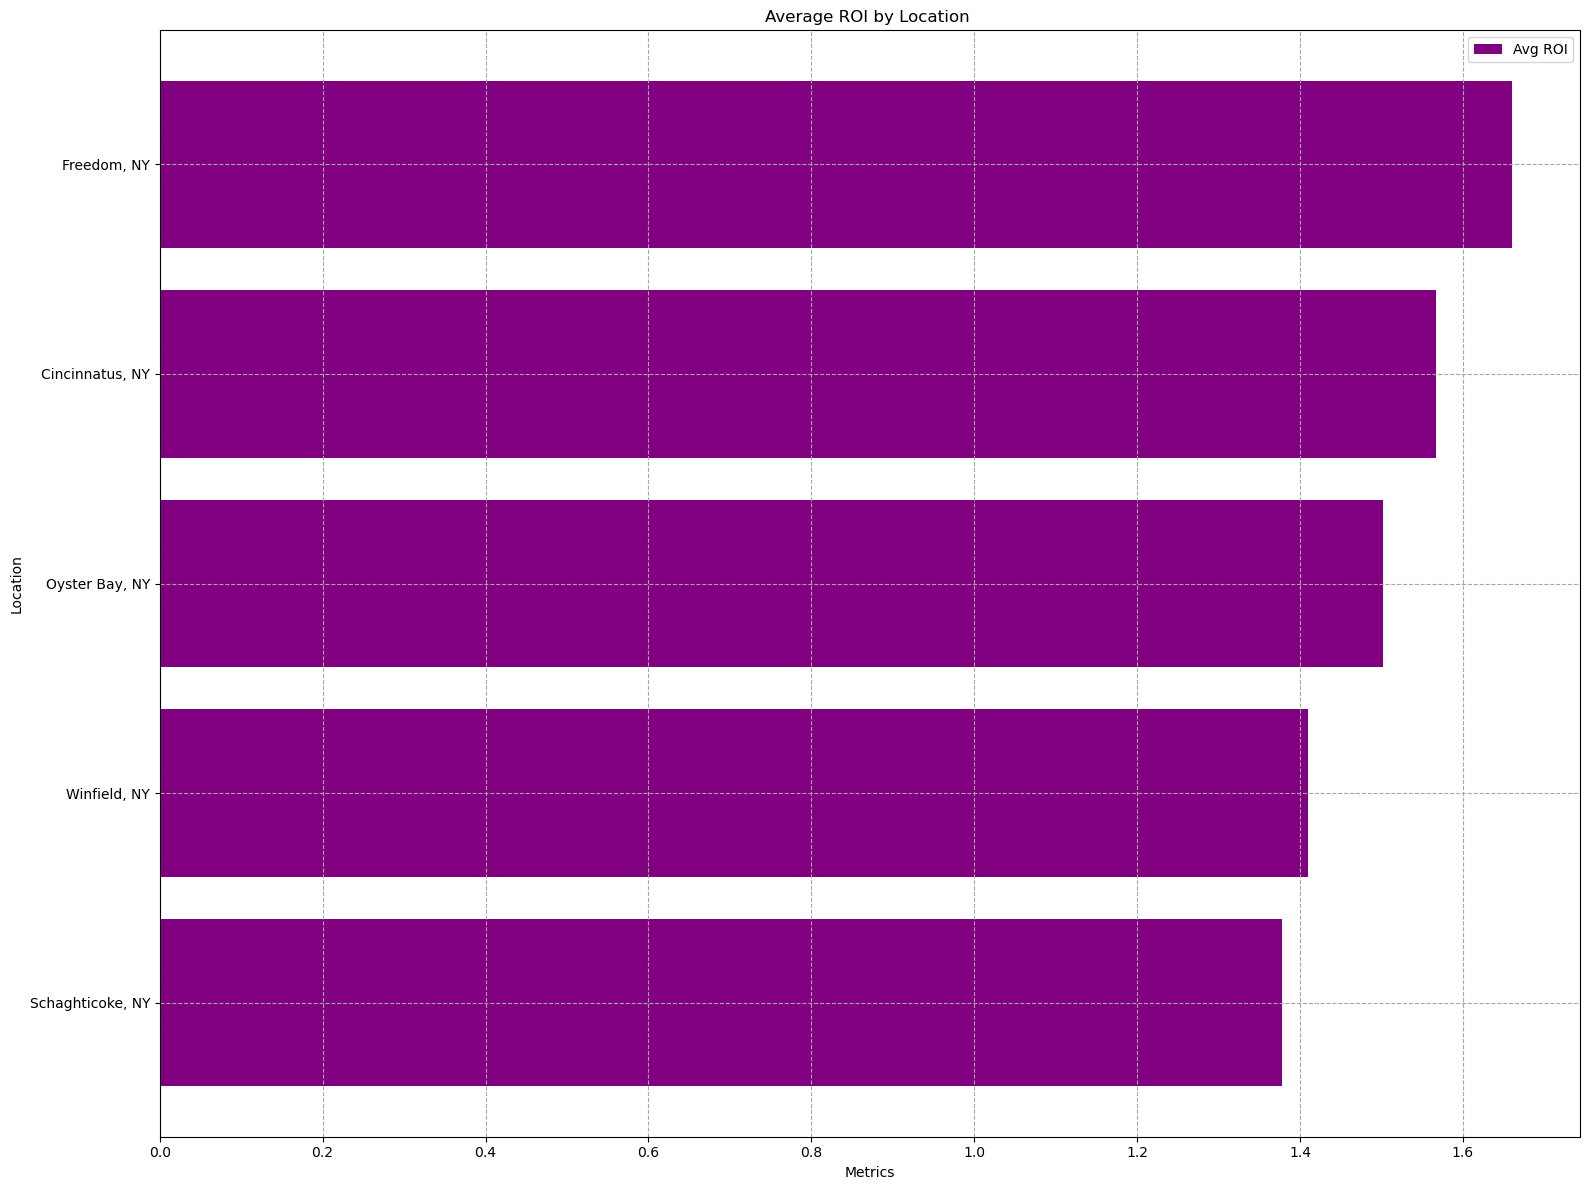

In [20]:
# Calculate the average ROI for each location
location_roi = RN_best5.groupby('location')['ROI'].mean().sort_values()

# Filter locations based on ROI (for example, select locations with positive ROI)
positive_roi_locations = location_roi[location_roi > 0]

# Plotting the average median house price and ROI by location for April 2018
plt.figure(figsize=(16, 12))
plt.barh(positive_roi_locations.index, location_roi[positive_roi_locations.index], color='purple', label='Avg ROI')
plt.title('Average ROI by Location ')
plt.xlabel('Metrics')
plt.ylabel('Location')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

##### Bivariate Analysis

We observe the trend of two variables. In this case we will watch the ROI and CV of these top 5 Cities in the New York state. 

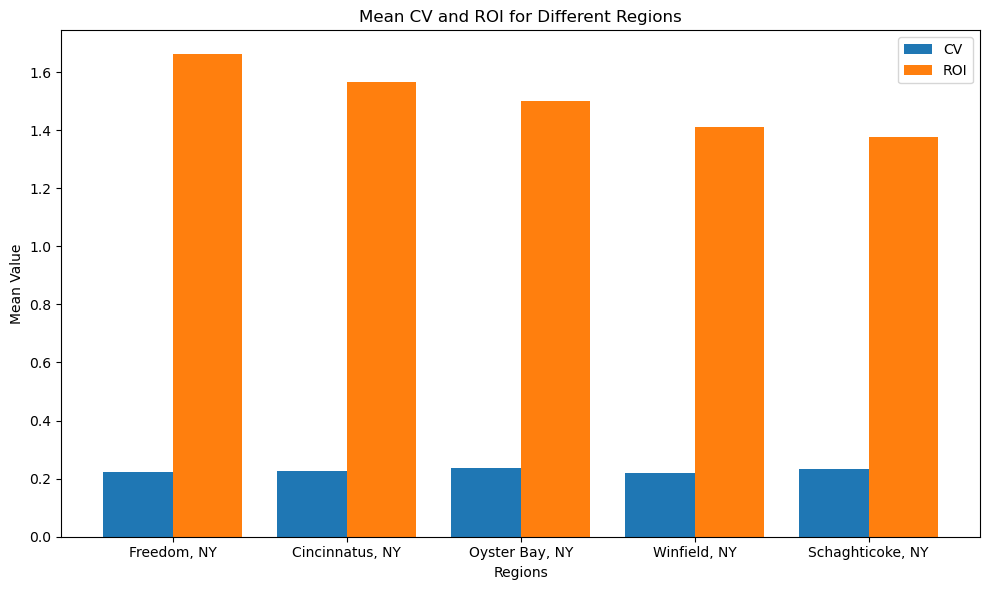

In [22]:
cv_values = []
roi_values = []

unique_regions = RN_best5['location'].unique()

for region in unique_regions:
    region = RN_best5[RN_best5['location'] == region]
    cv_mean = region['CV'].mean()
    roi_mean = region['ROI'].mean()
    cv_values.append(cv_mean)
    roi_values.append(roi_mean)

# Set up positions for the bars
x = np.arange(len(unique_regions))
width = 0.4

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cv_values, width, label='CV')
plt.bar(x + width/2, roi_values, width, label='ROI')
plt.xlabel('Regions')
plt.ylabel('Mean Value')
plt.title('Mean CV and ROI for Different Regions')
plt.xticks(x, unique_regions)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
RN_best5.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 'ROI', 'std',
       'mean', 'CV', 'location'],
      dtype='object', length=277)

##### Melting the dataframe from wide format to long format

Condensing the time columns into one time column and setting it as the index of the Dataframe. 

In [26]:
def get_datetimes(RN_best5):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    return pd.to_datetime(RN_best5.columns.values[7:], format='%Y-%m')

melted_df = pd.melt(RN_best5,
                    id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
                            'SizeRank', 'ROI', 'std', 'mean', 'CV', 'location'],
                    var_name='time')

melted_df['time'] = pd.to_datetime(melted_df['time'], infer_datetime_format=True)

melted_df = melted_df.dropna(subset=['SizeRank'])

melted_df.set_index('time', inplace=True)

melted_df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,ROI,std,mean,CV,location,value
time,,,,,,,,,,,,,
1996-04-01,63398,14065,Freedom,NY,Olean,Cattaraugus,14117,1.660714,15833.456790,70804.150943,0.223623,"Freedom, NY",39200.0
1996-04-01,62914,13040,Cincinnatus,NY,Cortland,Cortland,12947,1.566396,15828.431937,69980.000000,0.226185,"Cincinnatus, NY",36900.0
1996-04-01,62245,11771,Oyster Bay,NY,New York,Nassau,8577,1.501795,153623.803098,647299.245283,0.237330,"Oyster Bay, NY",334200.0
1996-04-01,63155,13491,Winfield,NY,Utica,Herkimer,11926,1.410023,16931.938595,77586.792453,0.218232,"Winfield, NY",43900.0
1996-04-01,62431,12154,Schaghticoke,NY,Albany,Rensselaer,12983,1.377880,35243.116639,151281.509434,0.232964,"Schaghticoke, NY",86800.0


In [27]:
melted_df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'ROI', 'std', 'mean', 'CV', 'location', 'value'],
      dtype='object')

## Time Series Data Modelling

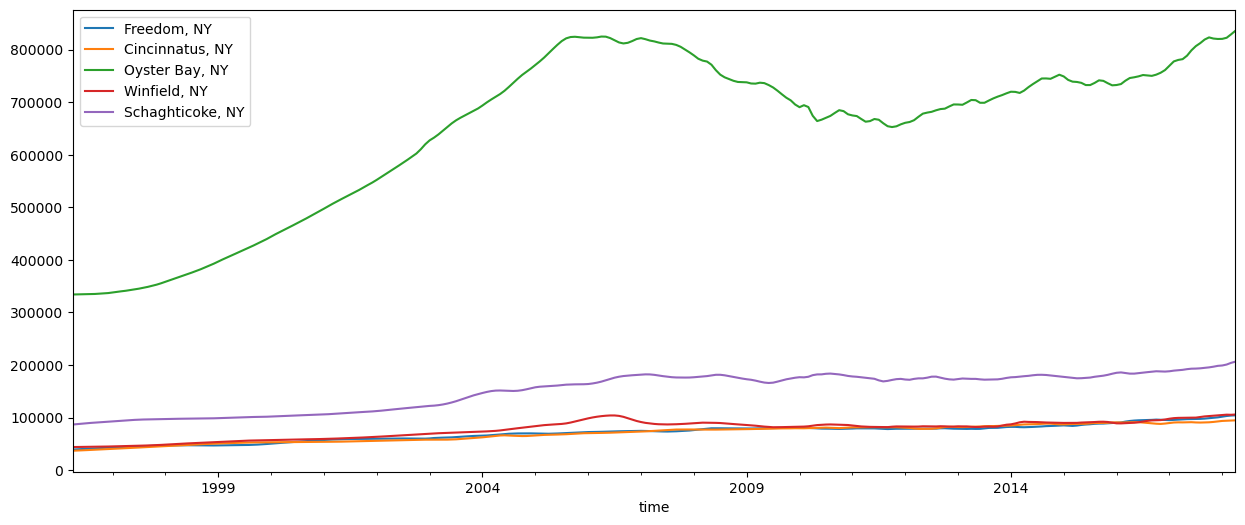

In [28]:
 # Get unique locations from the 'location' column
locations = melted_df['location'].unique()

# Loop through the unique locations and plot the 'value' column for each location
for location in locations:
    subset = melted_df[melted_df['location'] == location]
    subset['value'].plot(label=location, figsize=(15, 6))

plt.legend()
plt.show()